In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
%cd /home/stepan/kaggle/cars_from_auction

/home/stepan/kaggle/cars_from_auction


In [3]:
%ls

data/  prepare/  review/


In [4]:
%ls data/

processed/  sample_submission.csv  test_no_target.csv  train.csv  zipcodes.csv


In [5]:
data_file = 'data/train.csv'

In [6]:
data = pd.read_csv(data_file, index_col=0)

In [7]:
data_empty_power = data[data['power'] == 0]

In [10]:
data_empty_power

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price
81047,NaN,NaN,2016,NaN,0,vito,150000,NaN,mercedes_benz,NaN,45896,NaN,2457
51492,NaN,limousine,2000,manual,0,a_klasse,125000,gasoline,mercedes_benz,0.0,47877,70.0,1314
17234,1.6,NaN,2016,manual,0,2_reihe,150000,gasoline,peugeot,NaN,45883,NaN,500
88976,NaN,limousine,2002,manual,0,andere,125000,gasoline,kia,NaN,26789,110.0,1456
50554,NaN,limousine,2003,NaN,0,3er,150000,diesel,bmw,0.0,65479,160.0,2093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18557,NaN,NaN,16,NaN,0,NaN,150000,gasoline,opel,NaN,26969,NaN,864
70071,NaN,NaN,2016,manual,0,3er,150000,gasoline,bmw,NaN,66629,NaN,1365
31845,NaN,limousine,97,NaN,0,NaN,150000,gasoline,bmw,0.0,27726,NaN,2720
55047,NaN,limousine,2011,NaN,0,leon,70000,NaN,seat,0.0,90579,250.0,8180


In [11]:
data_empty_power.describe()

,engine_capacity,registration_year,power,mileage,damage,zipcode,insurance_price,price
count,911.000000,4294.000000,4294.0,4294.000000,2241.000000,4294.000000,3254.000000,4294.000000
mean,1.965203,1840.532371,0.0,128551.467163,0.174029,47714.289241,288.620160,3359.001397
std,1.111541,541.500019,0.0,41324.141033,0.379219,25212.929674,607.791228,6121.309215
min,0.000000,0.000000,0.0,5000.000000,0.000000,1067.000000,10.000000,455.000000
25%,1.400000,1997.000000,0.0,125000.000000,0.000000,27243.000000,70.000000,909.000000
50%,1.900000,2002.000000,0.0,150000.000000,0.000000,45896.000000,130.000000,1638.000000
75%,2.000000,2007.000000,0.0,150000.000000,0.000000,66333.000000,260.000000,3321.000000
max,9.200000,2016.000000,0.0,150000.000000,1.000000,99974.000000,12810.000000,112344.000000


# Visualize

In [8]:
default_figsize = (16, 12)
plt.rcParams.update({'font.size': 18})

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

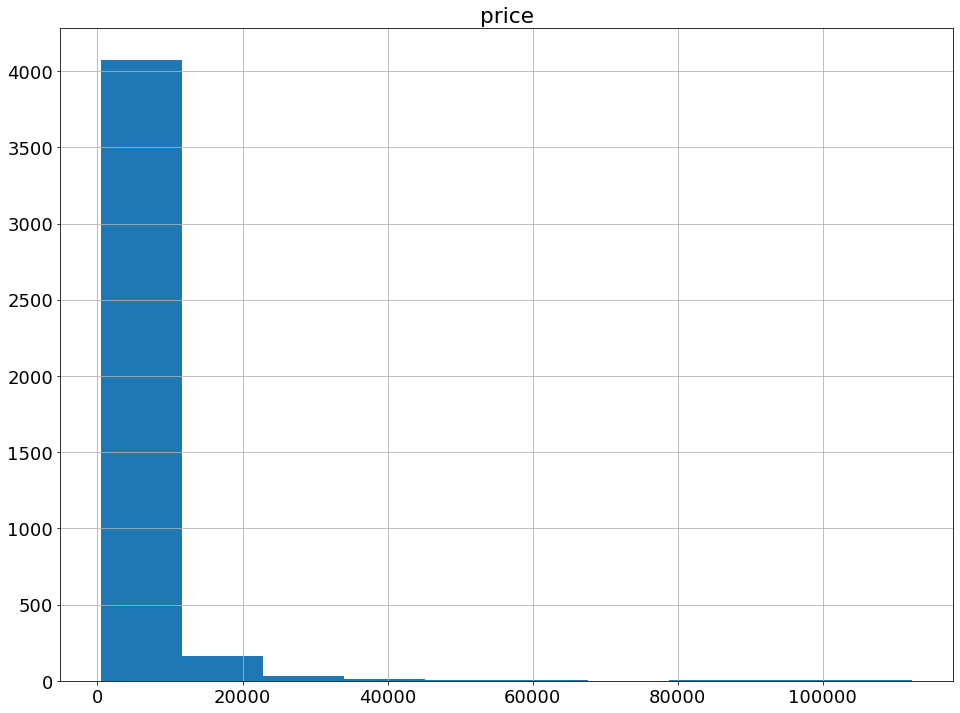

In [9]:
data_empty_power.hist(figsize=default_figsize, column=['price'])

In [13]:
data[data['engine_capacity'] > 5]

,engine_capacity,type,registration_year,gearbox,power,model,mileage,fuel,brand,damage,zipcode,insurance_price,price
27678,8.1,station wagon,2006,manual,90,astra,150000,gasoline,opel,0.0,23683,390.0,3503
50596,5.2,limousine,2007,auto,450,andere,150000,gasoline,audi,0.0,50126,920.0,18200
747,7.2,station wagon,2001,manual,101,NaN,150000,gasoline,ford,NaN,49413,80.0,1183
33792,6.4,station wagon,1997,manual,101,NaN,150000,gasoline,opel,1.0,32657,160.0,1274
32803,6.0,station wagon,1992,auto,109,andere,125000,diesel,citroen,0.0,56751,70.0,2366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49048,8.0,limousine,1998,manual,118,3er,150000,gasoline,bmw,0.0,50259,150.0,2639
33418,5.2,small car,90,manual,45,polo,5000,gasoline,volkswagen,1.0,78083,NaN,591
31195,7.0,limousine,2010,manual,136,c_klasse,100000,diesel,mercedes_benz,0.0,10965,960.0,12730
41259,8.2,small car,1997,NaN,0,corsa,150000,gasoline,opel,0.0,26897,60.0,728
